# Import packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [3]:
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt

# Load the dataset

In [5]:
df=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Identifying Fraudulent Activities/Fraud/Fraud_Data.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
ip=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Identifying Fraudulent Activities/Fraud/IpAddress_to_Country.csv')
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


# Questions

## Q1. For each user, determine her country based on the numeric IP address.

In [7]:
countries = []
for i in range(len(df)):
    ip_address = df.loc[i, 'ip_address']
    tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) &
                          (ip['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) == 1:
        countries.append(tmp['country'].values[0])
    else:
        countries.append('NA')
        
df['country'] = countries

df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [ ]:
def get_country(ip_address):
    tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) & (ip['upper_bound_ip_address'] >= ip_address)]
    return tmp['country'].values[0] if len(tmp) == 1 else 'NA'

df['country'] = df['ip_address'].apply(get_country)

## Q2. Build a model to predict whether an activity is fraudulent or not. Explain how different assumptions about the cost of false positives vs false negatives would impact the model.

### Feature Engineering

In [8]:
# Get the time difference between purchase time and signup time
df['signup_time'] = pd.to_datetime(df.signup_time)
df['purchase_time'] = pd.to_datetime(df.purchase_time)

# it is very suspicious for a user signup and then immediately purchase
df['interval_after_signup'] = (df.purchase_time - df.signup_time).dt.total_seconds()

In [9]:
# Check user number for unique devices
df['device_num'] = df.groupby('device_id')['user_id'].transform('count')

In [10]:
# Check user number for unique ip_address
df['ip_num'] = df.groupby('ip_address')['user_id'].transform('count')

In [11]:
# Signup day and week
df['signup_day'] = df['signup_time'].apply(lambda x: x.dayofweek)
df['signup_week'] = df['signup_time'].apply(lambda x: x.week)

# Purchase day and week
df['purchase_day'] = df['purchase_time'].apply(lambda x: x.dayofweek)
df['purchase_week'] = df['purchase_time'].apply(lambda x: x.week)

In [38]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_after_signup,device_num,ip_num,signup_day,signup_week,purchase_day,purchase_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,1,1,1,9,5,16
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,1,1,6,23,0,24
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,12,12,3,1,3,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,1,1,1,18,0,19
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,1,1,1,30,2,37


In [39]:
# Define features and target to be used
columns = ['signup_day', 'signup_week', 'purchase_day', 'purchase_week', 'purchase_value', 'source', 
           'browser', 'sex', 'age', 'country', 'interval_after_signup', 'device_num', 'ip_num', 'class']
data = df[columns]
data.head()

,signup_day,signup_week,purchase_day,purchase_week,purchase_value,source,browser,sex,age,country,interval_after_signup,device_num,ip_num,class
0,1,9,5,16,34,SEO,Chrome,M,39,Japan,4506682.0,1,1,0
1,6,23,0,24,16,Ads,Chrome,F,53,United States,17944.0,1,1,0
2,3,1,3,1,15,SEO,Opera,M,53,United States,1.0,12,12,1
3,1,18,0,19,44,SEO,Safari,M,41,NA,492085.0,1,1,0
4,1,30,2,37,39,Ads,Safari,M,45,United States,4361461.0,1,1,0


In [40]:
X=data.drop('class',axis=1)
y=data['class']

In [30]:
# Define Scaler
log_scale_transformer = make_pipeline(
    FunctionTransformer(func=np.log),
    StandardScaler()
)

# Create Transformer
column_trans = ColumnTransformer(
    transformers=[
        ("binned_numeric", KBinsDiscretizer(n_bins=10),
            ["purchase_value","age"]),

         ("scaler", StandardScaler(),
         ['interval_after_signup']),

        ("onehot_categorical", OneHotEncoder(),
            ['source','browser','sex','country']),

        ("passthrough_numeric", "passthrough",
            ['signup_day', 'signup_week', 'purchase_day', 'purchase_week', 'device_num', 'ip_num']),

    ])

# Fit and Transform
X_prepared=column_trans.fit_transform(X)

In [41]:
numeric_features = ["interval_after_signup","purchase_value","age", 'device_num', 'ip_num','signup_day', 'signup_week', 'purchase_day', 'purchase_week']
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ("scaler", StandardScaler())]
)

categorical_features = ['source','browser','sex','country']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120889, 219) (120889,)
(30223, 219) (30223,)


In [43]:
def get_feature_names(column_transformer):
    pairs_edges_columns = []
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    
    
    # Get columns and bin edges
    def pair_bin_edges_columns(bins_edges, columns):
        all_edge_column = []
        for index in range(len(columns)):
            bin_edge = bins_edges[index]
            column = columns[index]
            
            pair_bin_edge = []
            # match consecutive bin edges together
            for first, second in zip(bin_edge, bin_edge[1:]):
                pair_bin_edge.append((first, second))
            
            bin_edge_column = [column +": ["+ str(edge[0]) +", "+ str(edge[1])+")"  for edge in pair_bin_edge]
            all_edge_column.extend(bin_edge_column)
        return all_edge_column
    
    
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            
            # For transformers that create bins
            if hasattr(trans, 'bin_edges_'):
                bins_edges = trans.bin_edges_
                pairs_edges_columns = pair_bin_edges_columns(bins_edges, column)
            if column is None:
                return []
            else:
                return [name + "__" + f for f in pairs_edges_columns]
        return [name + "__" + f for f in trans.get_feature_names(column)]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    for name, trans, column, _ in l_transformers:
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [45]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [46]:
feature_names =get_feature_names(column_trans)
feature_names

C:\Users\seagu\AppData\Local\Temp\ipykernel_23112\1809191144.py:30: UserWarning: Transformer binned_numeric (type KBinsDiscretizer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_23112\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### models

In [16]:
from xgboost import XGBClassifier

In [18]:
#Grid Search for GradientBoostingClassifier
param_grid = {'max_depth': range (2, 10, 1),'learning_rate': [0.05,0.01, 0.1], 'n_estimators':range(60, 220, 40),"reg_lambda":[.01,.1,.5] }
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, n_jobs = 1, cv=10, verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40),
                         'reg_lambda': [0.01, 0.1, 0.5]},
             verbose=True)

In [19]:
print(f'Gradient Boost:\n\t *best params: {xgb_grid.best_params_}\n\t *best score: {xgb_grid.best_score_}')

Gradient Boost:
	 *best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'reg_lambda': 0.1}
	 *best score: 0.9567289144777161


In [20]:
#### Using Optimal values of Hyperparameters
best_xgb = XGBClassifier(learning_rate=0.01,max_depth=8,n_estimators=100,reg_lambda=0.1)
best_xgb.fit(X_train, y_train)
best_xgb_predicted = best_xgb.predict(X_test)

In [21]:
# print prediction results
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_xgb_predicted)))
print('Model accuracy score with Grid Search on train set: {0:0.4f}'. format(best_xgb.score(X_train,y_train)))

print('Training error =', 100*(1-best_xgb.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_xgb.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, best_xgb_predicted))
print(classification_report(y_test, best_xgb_predicted))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,best_xgb_predicted)))

Model accuracy score with Grid Search on test set: 0.9564
Model accuracy score with Grid Search on train set: 0.9569
Training error = 4.308911480779887 %
Testing error 4.36422592065645 %
F1 Score:  0.6992018244013684
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27373
           1       1.00      0.54      0.70      2850

    accuracy                           0.96     30223
   macro avg       0.98      0.77      0.84     30223
weighted avg       0.96      0.96      0.95     30223

Confusion Matrix : 
[[27371     2]
 [ 1317  1533]]


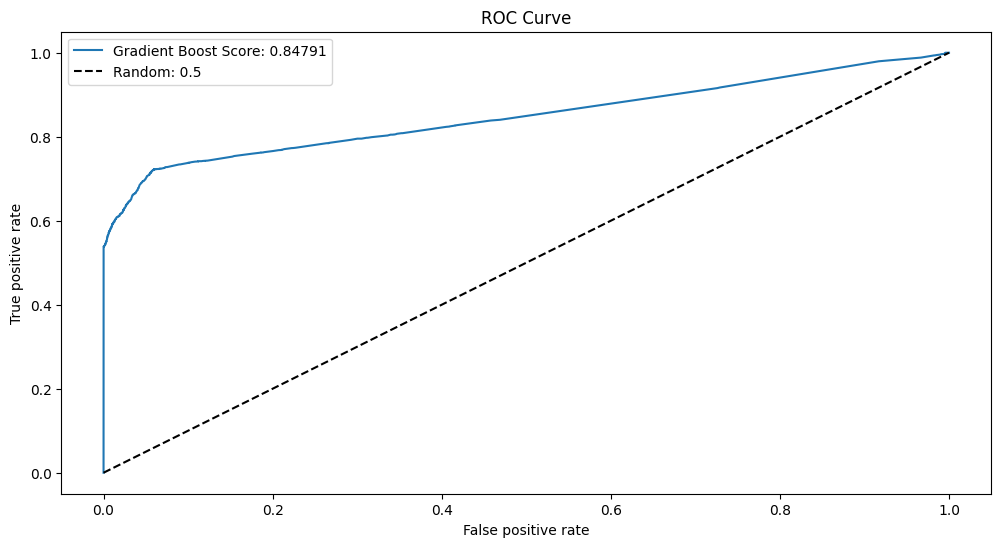

In [47]:
fpr_gb, tpr_gb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:,1])
gb_roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:,1] , average = 'macro')

plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boost Score: ' + str(round(gb_roc_auc, 5)))


plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## Q3. Your boss is a bit worried about using a model she doesn't understand for something as important as fraud detection. How would you explain her how the model is making the predictions? Not from a mathematical perspective (she couldn't care less about that), but from a user perspective. What kinds of users are more likely to be classified as at risk? What are their characteristics?

In [49]:
# Get the Booster object from the trained model
booster = best_xgb.get_booster()

In [51]:
from xgboost import plot_importance

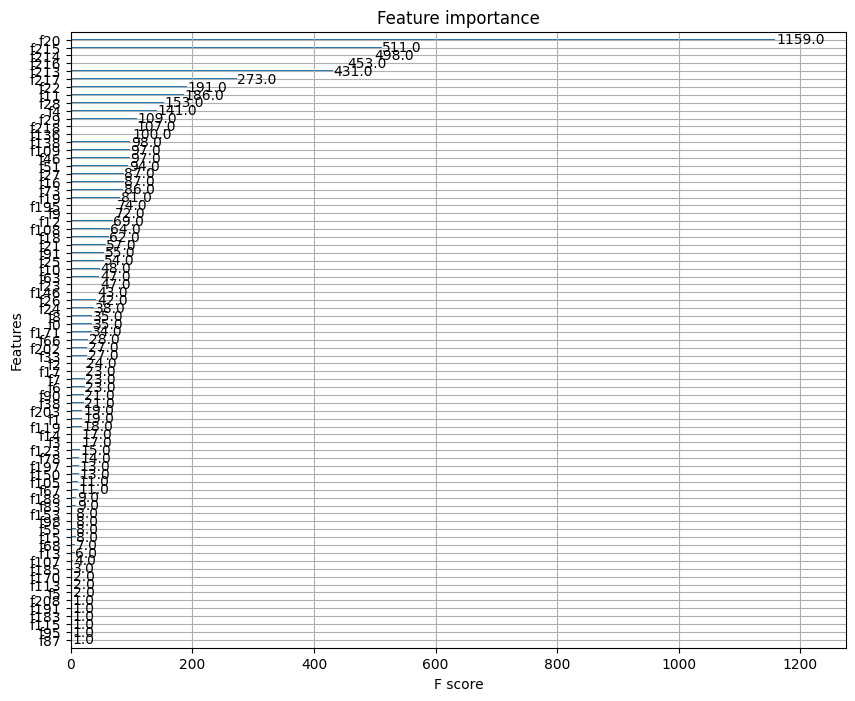

In [53]:
# feature importance
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(best_xgb, ax=ax)
plt.show()

## Q4. Let's say you now have this model which can be used live to predict in real time if an activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?

In [ ]:
#Product perspective